In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [4]:
# setting
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_tab', -1)

## 概览

In [4]:
print('\n'. join(os.listdir('../rawdata')))

application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
HomeCredit_columns_description.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
sample_submission.csv


+ application_test.csv   每笔贷款申请时的数据，为测试集
+ application_train.csv   同上，为训练集
+ bureau.csv   从信贷局中返回HomeCredit用户在其他贷款平台上的信用审核情况
+ bureau_balance.csv   信贷局上用户的月度余额信息
+ credit_card_balance.csv  HomeCredit用户申请时使用的信用卡月度余额
+ HomeCredit_columns_description.csv    文件每列说明
+ installments_payments.csv    HomeCredit上已有信用支付的偿还历史记录
+ POS_CASH_balance.csv    HomeCredit用户现金贷月度余额
+ previous_application.csv    HomeCredit贷款用户之前的申请记录
+ sample_submission.csv    模型结果提交示例


### application_test

In [5]:
application_train = pd.read_csv('../rawdata/application_train.csv')

In [3]:
application_train.shape

(307511, 122)

In [7]:
application_test = pd.read_csv('../rawdata/application_test.csv')

In [8]:
application_test.shape

(48744, 121)

In [11]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [12]:
from rosaceae.utils import summary 

In [14]:
application_summary = summary(application_train.drop(labels=['SK_ID_CURR', 'TARGET'], axis=1))

In [15]:
application_summary.head()

,Field,Type,Recs,Miss,Min,Q25,Q50,Avg,Q75,Max,StDv,Uniq,OutLo,OutHi
0,NAME_CONTRACT_TYPE,object,307511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1,CODE_GENDER,object,307511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
2,FLAG_OWN_CAR,object,307511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
3,FLAG_OWN_REALTY,object,307511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
4,CNT_CHILDREN,int64,307511,0,0.0,0.0,0.0,0.4171,1.0,19.0,0.7221,15,0,4272


In [16]:
application_summary.to_csv('application_summary.csv', index=False)

In [4]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 指标分布情况

In [35]:
def barplot(variable):  
    grouped = application_train[['TARGET', variable, 'SK_ID_CURR']].groupby(by=[variable, 'TARGET'])
    value_counts =  grouped['SK_ID_CURR'].agg('count')
    y1, y2 = [[value_counts[i].get(j, 0) for i in sorted(set(value_counts.index.get_level_values(0)))] 
              for j in sorted(set(value_counts.index.get_level_values(1)))]
    labels = sorted(set(value_counts.index.get_level_values(0)))
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(9, 6))
    rects1 = ax.bar(x - width/2, y1, width, label='0')
    rects2 = ax.bar(x + width/2, y2, width, label='1')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Counts')
    ax.set_title(variable)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    totals = [y1[_i] + y2[_i] for _i in range(len(y1))]
    totals_rate = ['%s: %.2f%%' % (labels[i], j / sum(totals) * 100) for i, j in enumerate(totals)]
    
    def autolabel(rects, totals):
        for _i, rect in enumerate(rects):
            height = rect.get_height()
            #print(_i, height, totals)
            ax.annotate('{}, {:.2f}%'.format(height, height/totals[_i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    autolabel(rects1, totals)
    autolabel(rects2, totals)
    fig.tight_layout()
    print('\t'.join(totals_rate))
    plt.show()        

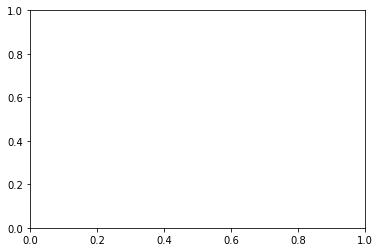

In [34]:
fig, ax = plt.subplots()

In [38]:
def densityplot(variable, ticks=None):
    if sum(pd.isnull(application_train[variable])) > 0:
        print("NaN found, %s" % sum(pd.isnull(application_train[variable])))
    plt.figure(figsize=(9,6))
    tmp = application_train[variable].copy()
    tmp.fillna(0, inplace=True)
    sns.distplot(tmp[application_train['TARGET']==1], label='1', hist=False)
    sns.distplot(tmp[application_train['TARGET']==0], label='0', hist=False)
    plt.legend()
    if ticks:
        plt.xticks(ticks)
    plt.grid(True)
    plt.show()

### NAME_CONTRACT_TYPE 合约类型

Cash loans: 90.48%	Revolving loans: 9.52%


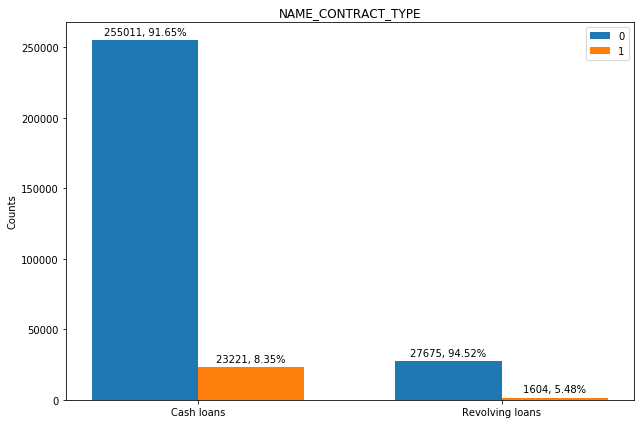

In [36]:
barplot('NAME_CONTRACT_TYPE')

大部分是现金贷类型，循环贷比较少。现金贷中逾期行占比稍高一些

### CODE_GENDER 性别

F: 65.83%	M: 34.16%	XNA: 0.00%


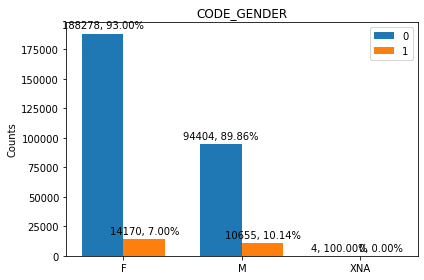

In [118]:
barplot('CODE_GENDER')

性别数据存在少量的缺失（一共缺失样本4个），男性客户逾期占比大于女性客户。客户性别女性占多数

### FLAG_OWN_CAR 是否有车

N: 65.99%	Y: 34.01%


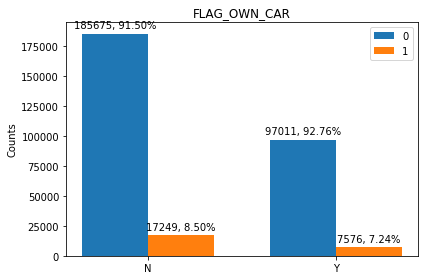

In [119]:
barplot('FLAG_OWN_CAR')

客户群体有车占少数，同时有车用户的逾期占比稍低一些。可能有车客户经济情况好一些。

### FLAG_OWN_REALTY 是否有不动产

N: 30.63%	Y: 69.37%


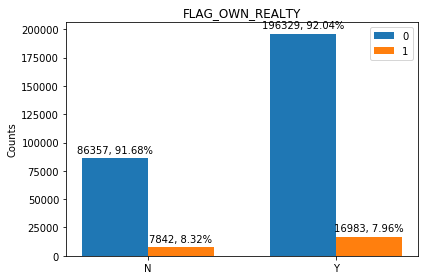

In [120]:
barplot('FLAG_OWN_REALTY')

客户群体中有不动产的比例比较高，而且该部分客户的逾期占比稍低于未拥有不动产的客户

### CNT_CHILDREN 家庭有几个小朋友

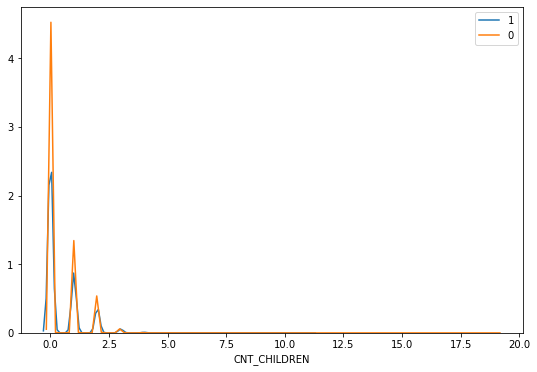

In [134]:
densityplot('CNT_CHILDREN')

可以看到，可能会有一些比较异常的极端值出现。

### AMT_INCOME_TOTAL 总收入

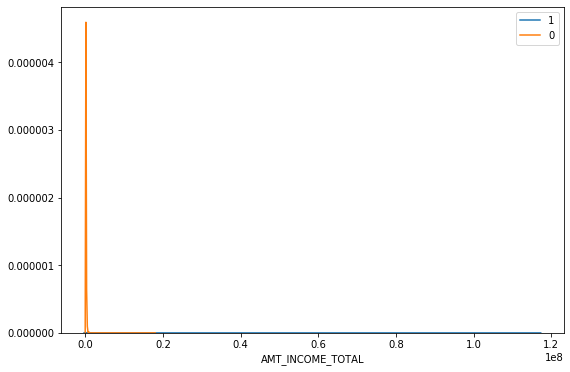

In [135]:
densityplot('AMT_INCOME_TOTAL')

逾期用户中，出现了一些异常值

### AMT_CREDIT 信用额度

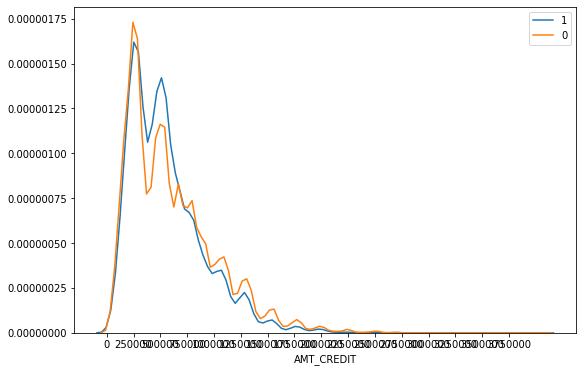

In [10]:
densityplot('AMT_CREDIT', range(0,4000000,250000))

好坏用户在信用卡额度指标上分布类似，在250000到750000这个区间坏用户比例，会比较高，在1000000后面开始好用户比例稍高于坏用户

### AMT_ANNUITY 年金 

NaN found, 12


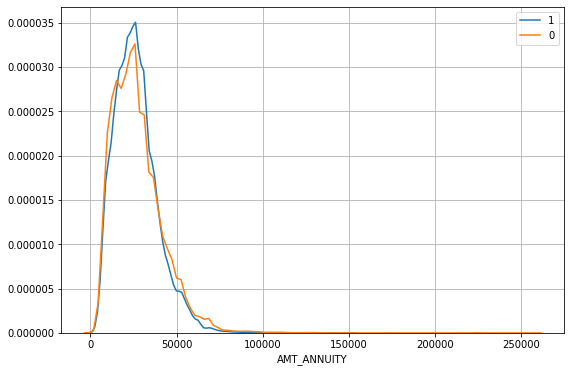

In [20]:
densityplot('AMT_ANNUITY')

二者分布类似, 25000处，坏用户比例稍高

### AMT_GOODS_PRICE

NaN found, 278


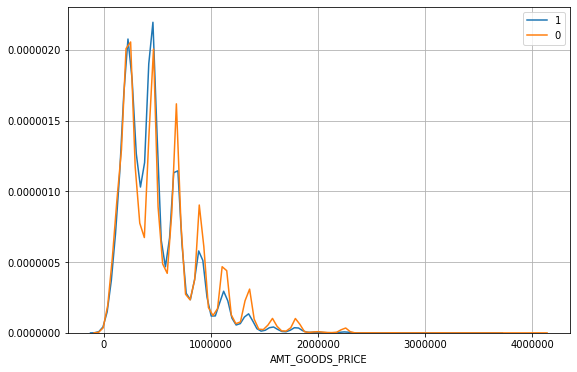

In [23]:
densityplot('AMT_GOODS_PRICE')

NAME_TYPE_SUITE
Children: 1.07%	Family: 13.11%	Group of people: 0.09%	Other_A: 0.28%	Other_B: 0.58%	Spouse, partner: 3.71%	Unaccompanied: 81.16%


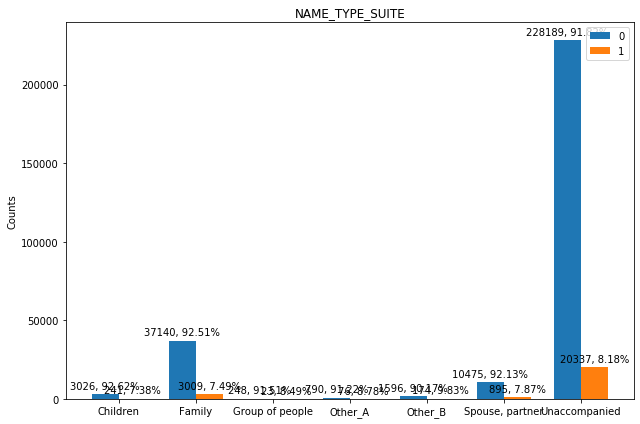

--------------------
NAME_INCOME_TYPE
Businessman: 0.00%	Commercial associate: 23.29%	Maternity leave: 0.00%	Pensioner: 18.00%	State servant: 7.06%	Student: 0.01%	Unemployed: 0.01%	Working: 51.63%


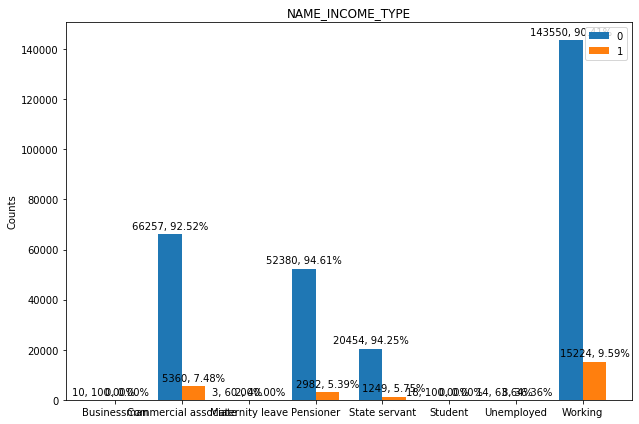

--------------------
NAME_EDUCATION_TYPE
Academic degree: 0.05%	Higher education: 24.34%	Incomplete higher: 3.34%	Lower secondary: 1.24%	Secondary / secondary special: 71.02%


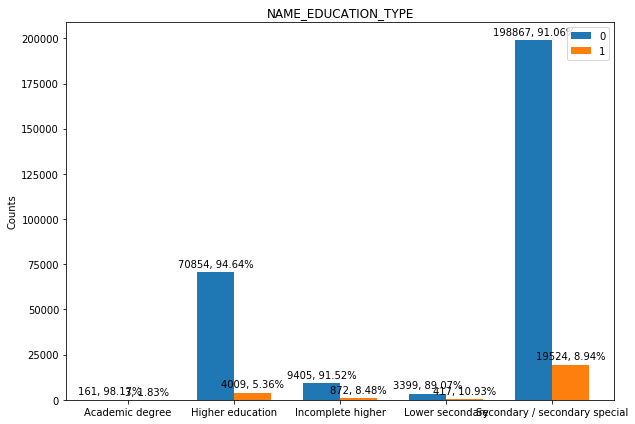

--------------------
NAME_FAMILY_STATUS
Civil marriage: 9.68%	Married: 63.88%	Separated: 6.43%	Single / not married: 14.78%	Unknown: 0.00%	Widow: 5.23%


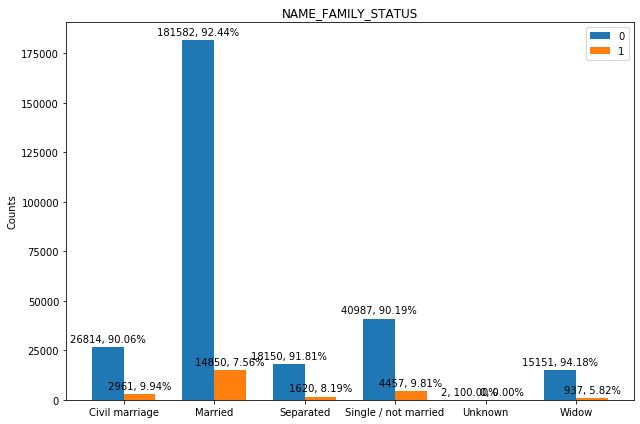

--------------------
NAME_HOUSING_TYPE
Co-op apartment: 0.36%	House / apartment: 88.73%	Municipal apartment: 3.64%	Office apartment: 0.85%	Rented apartment: 1.59%	With parents: 4.83%


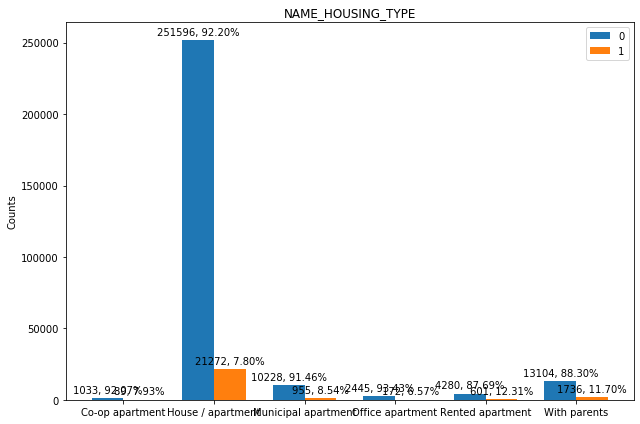

--------------------
REGION_POPULATION_RELATIVE


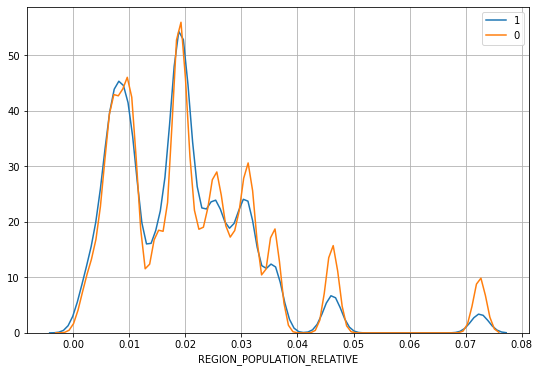

--------------------
DAYS_BIRTH


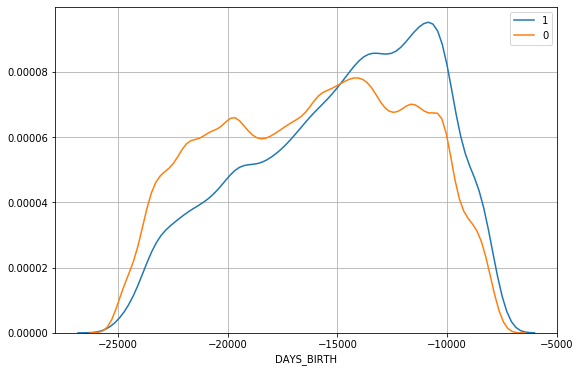

--------------------
DAYS_EMPLOYED


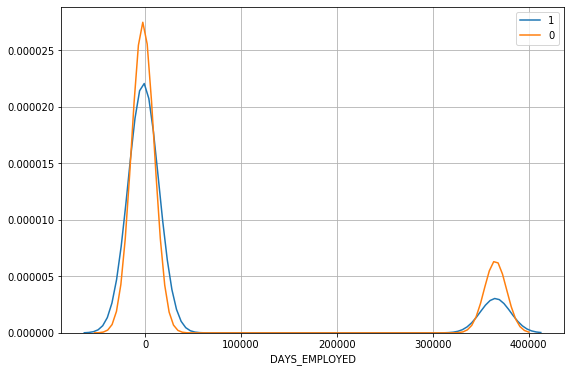

--------------------
DAYS_REGISTRATION


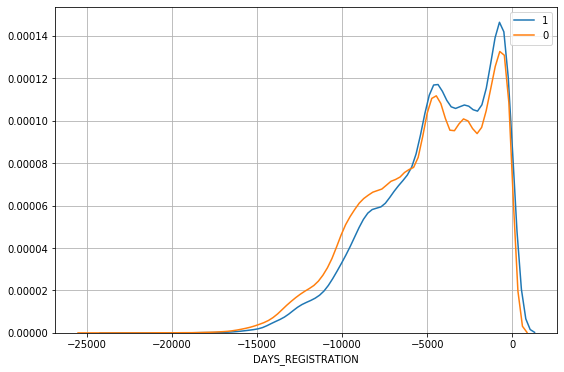

--------------------
DAYS_ID_PUBLISH


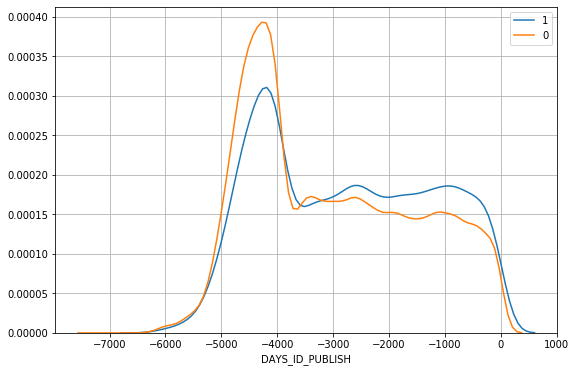

--------------------
OWN_CAR_AGE
NaN found, 202929


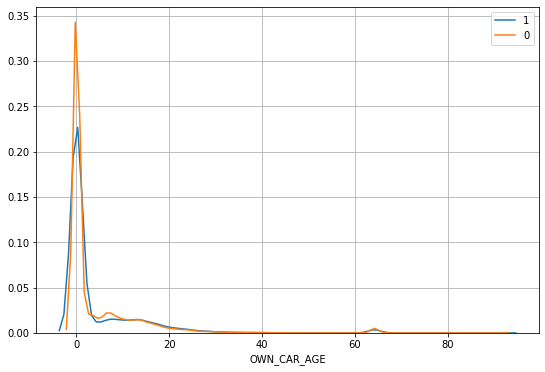

--------------------
FLAG_MOBIL
0: 0.00%	1: 100.00%


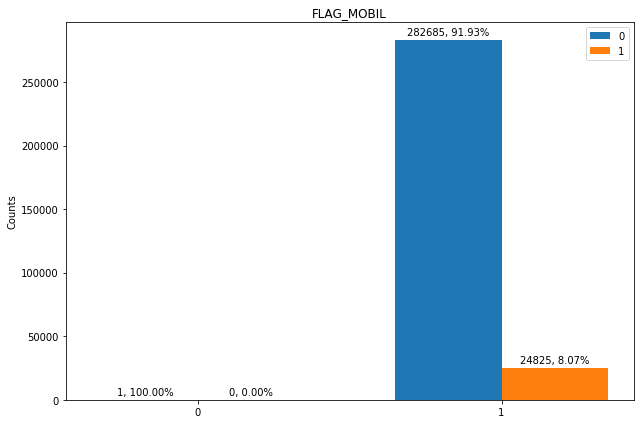

--------------------
FLAG_EMP_PHONE
0: 18.01%	1: 81.99%


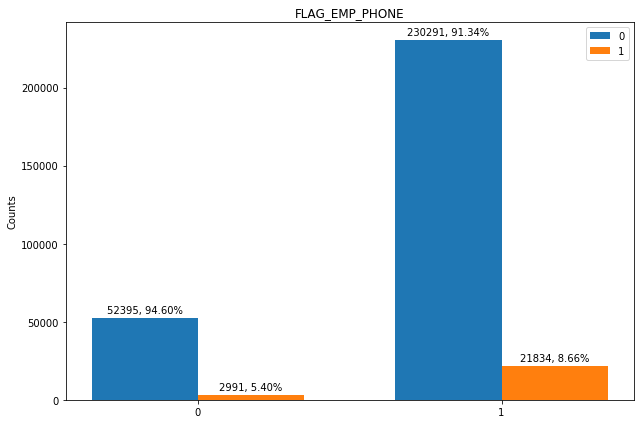

--------------------
FLAG_WORK_PHONE
0: 80.06%	1: 19.94%


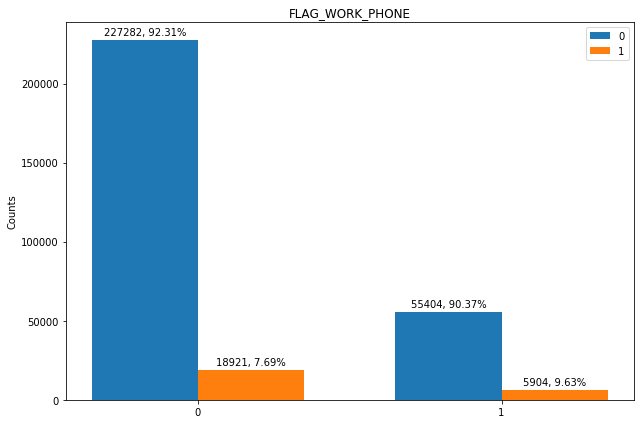

--------------------
FLAG_CONT_MOBILE
0: 0.19%	1: 99.81%


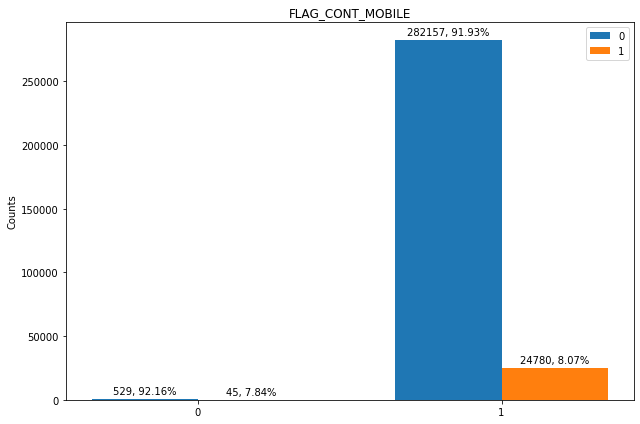

--------------------
FLAG_PHONE
0: 71.89%	1: 28.11%


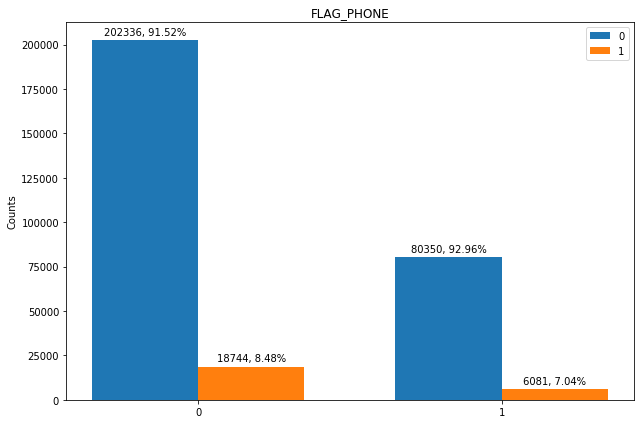

--------------------
FLAG_EMAIL
0: 94.33%	1: 5.67%


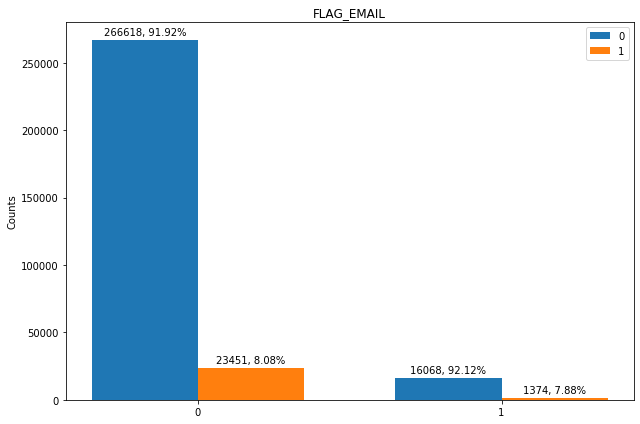

--------------------
OCCUPATION_TYPE
Accountants: 4.65%	Cleaning staff: 2.20%	Cooking staff: 2.82%	Core staff: 13.06%	Drivers: 8.81%	HR staff: 0.27%	High skill tech staff: 5.39%	IT staff: 0.25%	Laborers: 26.14%	Low-skill Laborers: 0.99%	Managers: 10.12%	Medicine staff: 4.04%	Private service staff: 1.26%	Realty agents: 0.36%	Sales staff: 15.21%	Secretaries: 0.62%	Security staff: 3.18%	Waiters/barmen staff: 0.64%


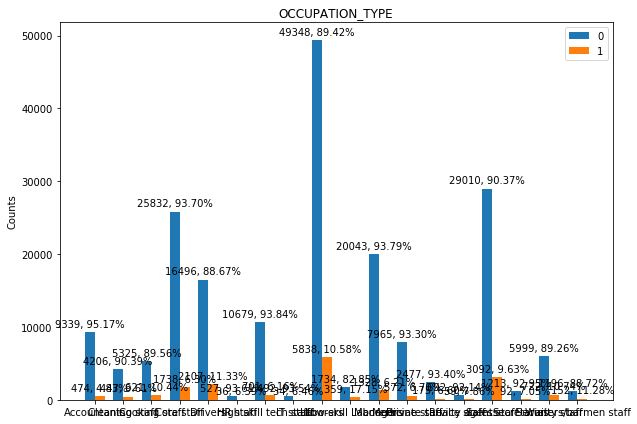

--------------------
CNT_FAM_MEMBERS
NaN found, 2


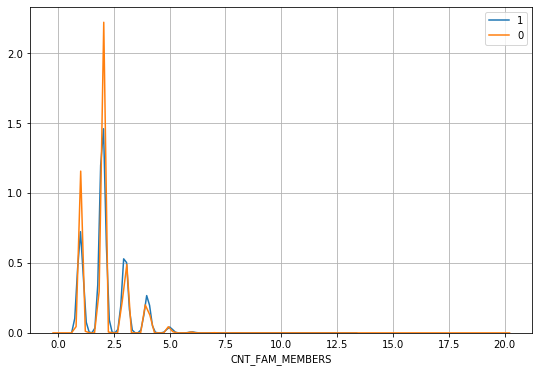

--------------------
REGION_RATING_CLIENT


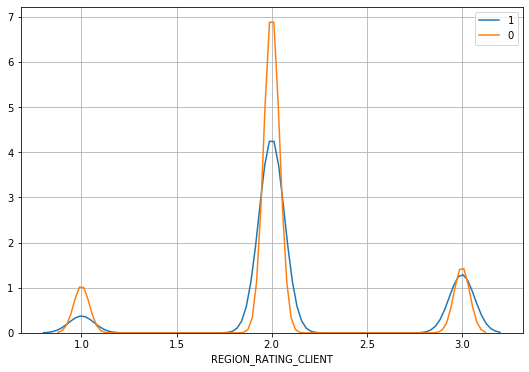

--------------------
REGION_RATING_CLIENT_W_CITY


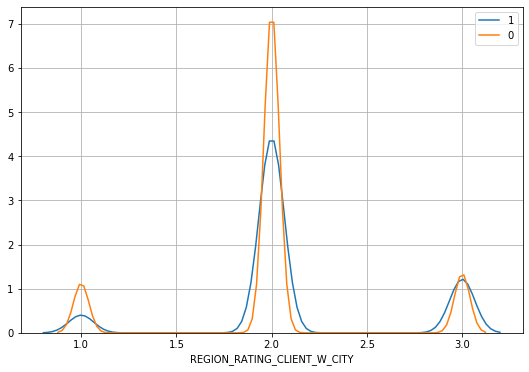

--------------------
WEEKDAY_APPR_PROCESS_START
FRIDAY: 16.37%	MONDAY: 16.49%	SATURDAY: 11.01%	SUNDAY: 5.26%	THURSDAY: 16.45%	TUESDAY: 17.53%	WEDNESDAY: 16.89%


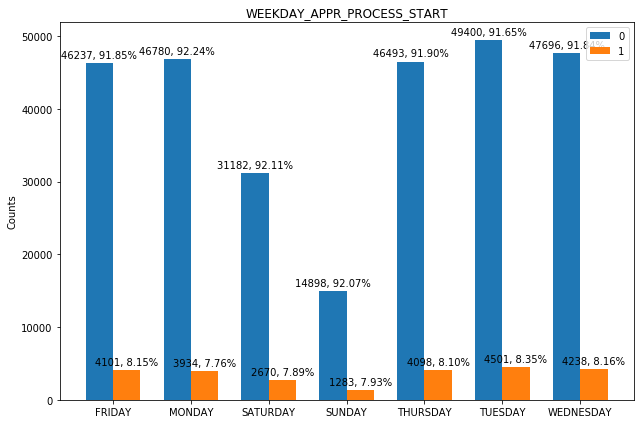

--------------------
HOUR_APPR_PROCESS_START


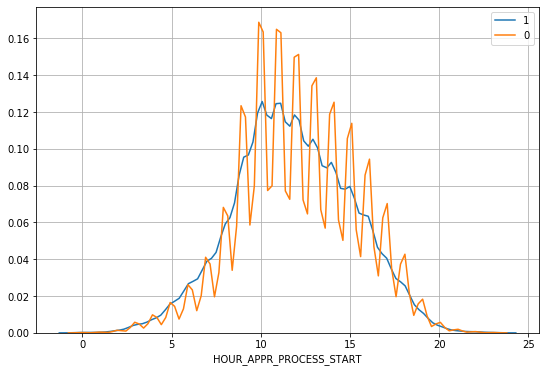

--------------------
REG_REGION_NOT_LIVE_REGION


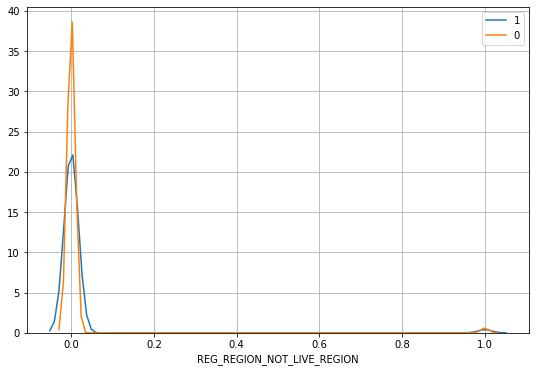

--------------------
REG_REGION_NOT_WORK_REGION


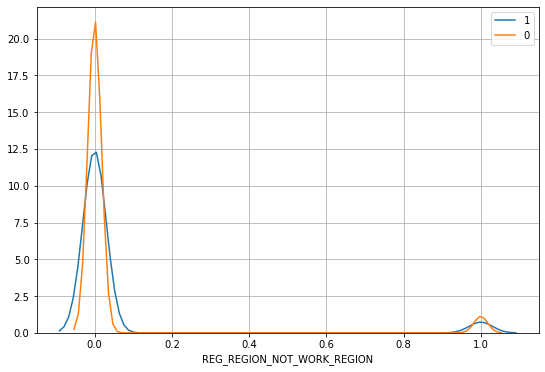

--------------------
LIVE_REGION_NOT_WORK_REGION


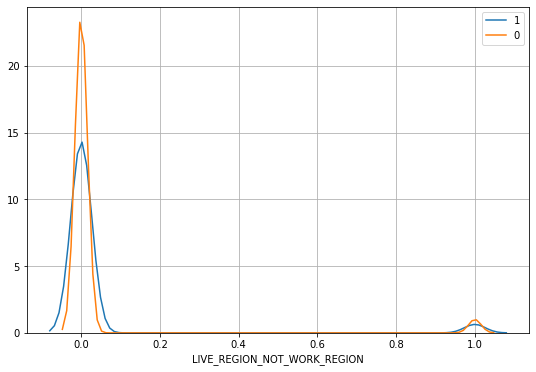

--------------------
REG_CITY_NOT_LIVE_CITY


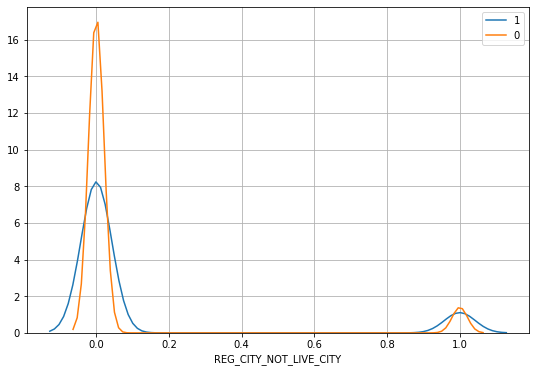

--------------------
REG_CITY_NOT_WORK_CITY


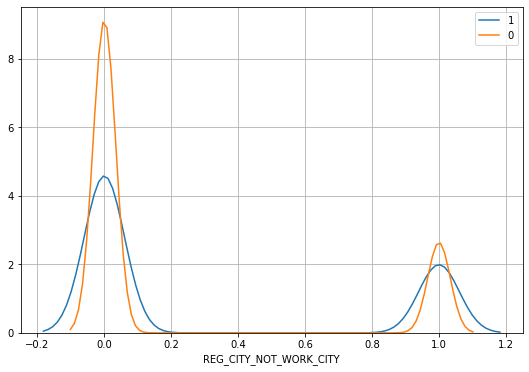

--------------------
LIVE_CITY_NOT_WORK_CITY


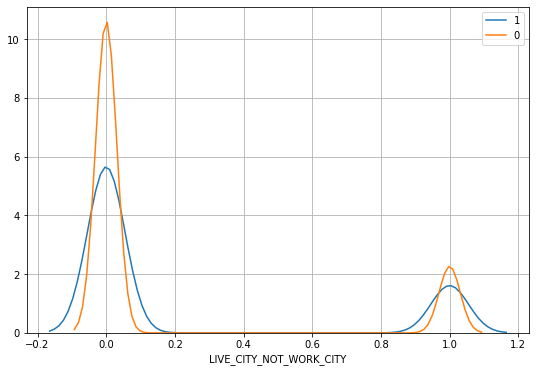

--------------------
ORGANIZATION_TYPE
Advertising: 0.14%	Agriculture: 0.80%	Bank: 0.82%	Business Entity Type 1: 1.95%	Business Entity Type 2: 3.43%	Business Entity Type 3: 22.11%	Cleaning: 0.08%	Construction: 2.19%	Culture: 0.12%	Electricity: 0.31%	Emergency: 0.18%	Government: 3.38%	Hotel: 0.31%	Housing: 0.96%	Industry: type 1: 0.34%	Industry: type 10: 0.04%	Industry: type 11: 0.88%	Industry: type 12: 0.12%	Industry: type 13: 0.02%	Industry: type 2: 0.15%	Industry: type 3: 1.07%	Industry: type 4: 0.29%	Industry: type 5: 0.19%	Industry: type 6: 0.04%	Industry: type 7: 0.43%	Industry: type 8: 0.01%	Industry: type 9: 1.10%	Insurance: 0.19%	Kindergarten: 2.24%	Legal Services: 0.10%	Medicine: 3.64%	Military: 0.86%	Mobile: 0.10%	Other: 5.43%	Police: 0.76%	Postal: 0.70%	Realtor: 0.13%	Religion: 0.03%	Restaurant: 0.59%	School: 2.89%	Security: 1.06%	Security Ministries: 0.64%	Self-employed: 12.49%	Services: 0.51%	Telecom: 0.19%	Trade: type 1: 0.11%	Trade: type 2: 0.62%	Trade: type 3: 1.14%	Tra

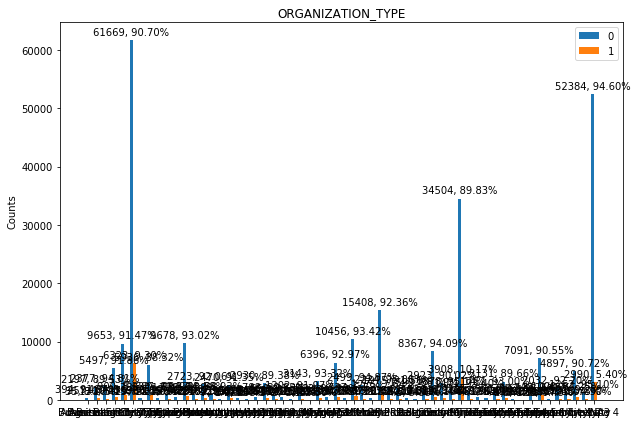

--------------------
EXT_SOURCE_1
NaN found, 173378


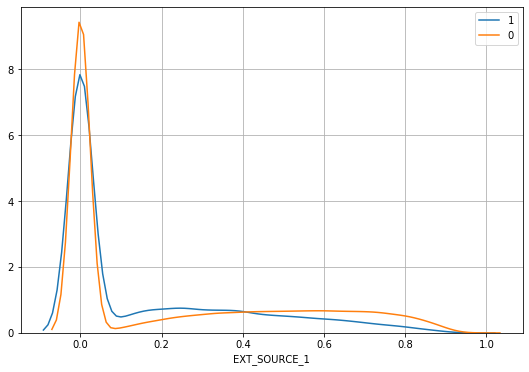

--------------------
EXT_SOURCE_2
NaN found, 660


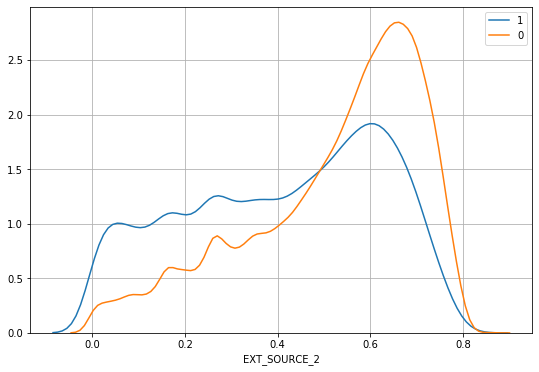

--------------------
EXT_SOURCE_3
NaN found, 60965


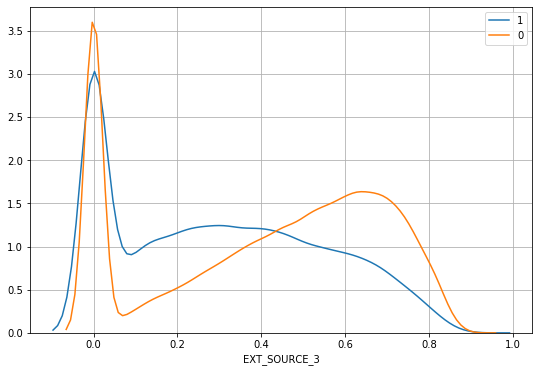

--------------------
APARTMENTS_AVG
NaN found, 156061


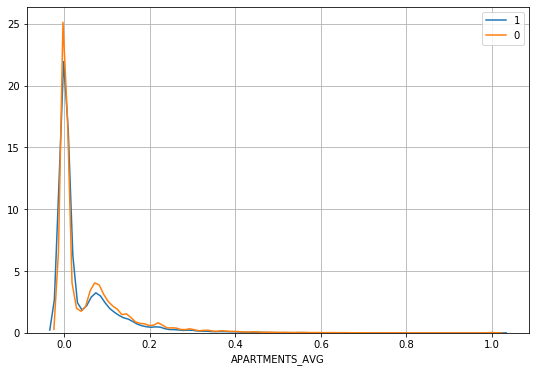

--------------------
BASEMENTAREA_AVG
NaN found, 179943


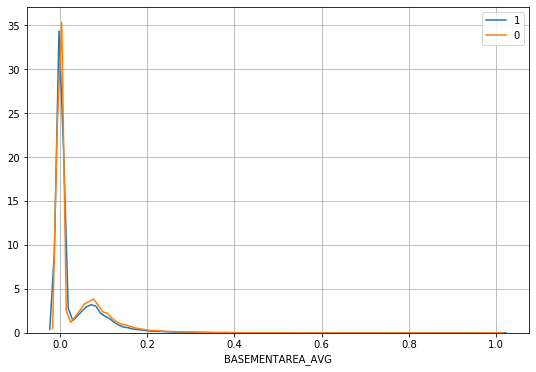

--------------------
YEARS_BEGINEXPLUATATION_AVG
NaN found, 150007


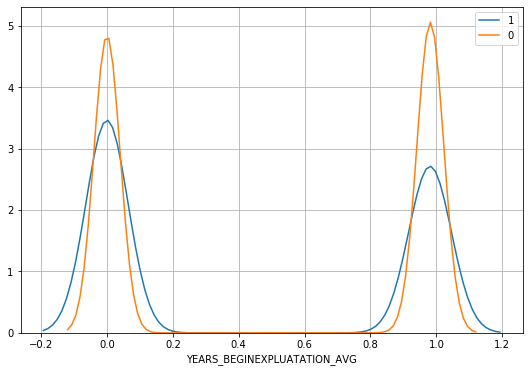

--------------------
YEARS_BUILD_AVG
NaN found, 204488


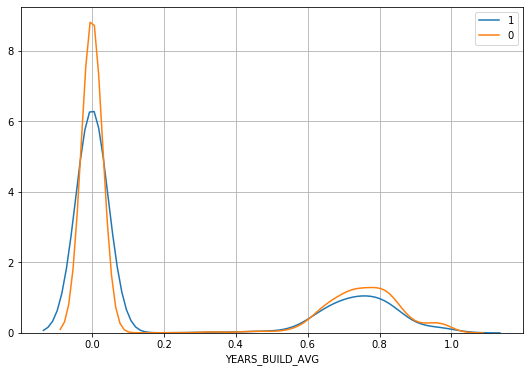

--------------------
COMMONAREA_AVG
NaN found, 214865


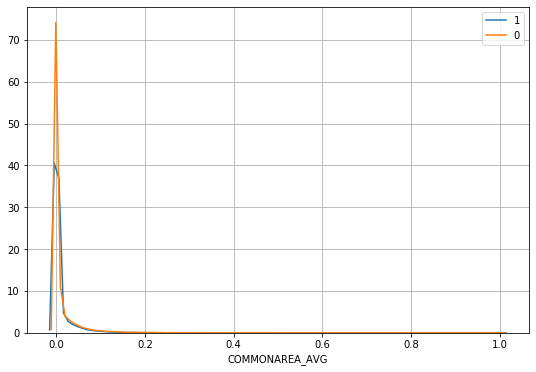

--------------------
ELEVATORS_AVG
NaN found, 163891


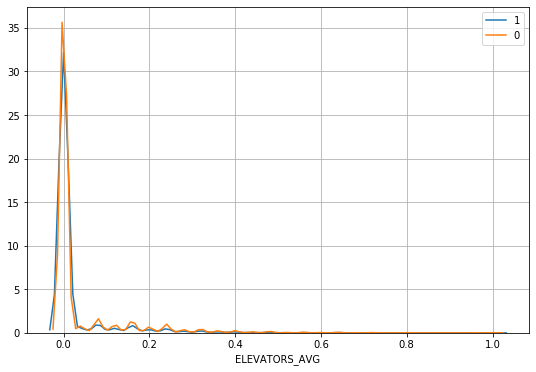

--------------------
ENTRANCES_AVG
NaN found, 154828


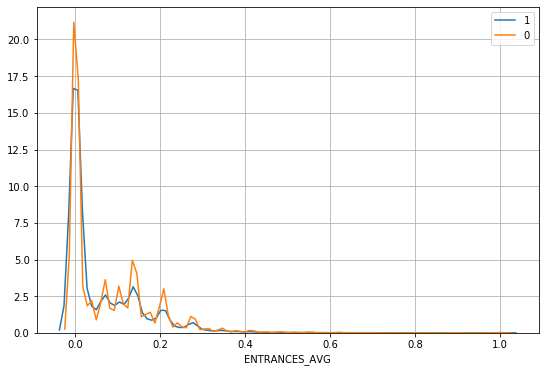

--------------------
FLOORSMAX_AVG
NaN found, 153020


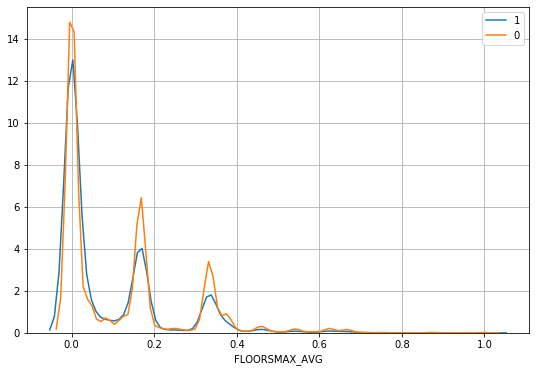

--------------------
FLOORSMIN_AVG
NaN found, 208642


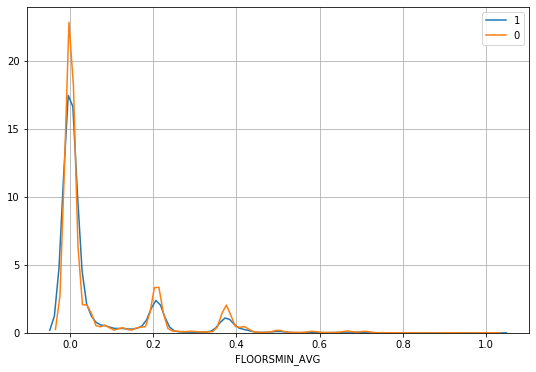

--------------------
LANDAREA_AVG
NaN found, 182590


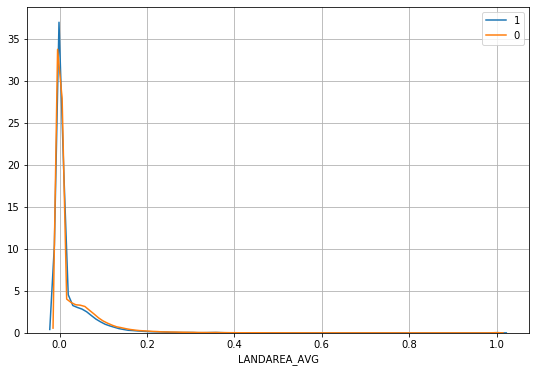

--------------------
LIVINGAPARTMENTS_AVG
NaN found, 210199


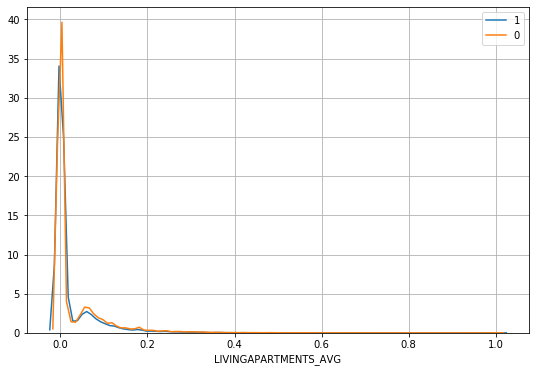

--------------------
LIVINGAREA_AVG
NaN found, 154350


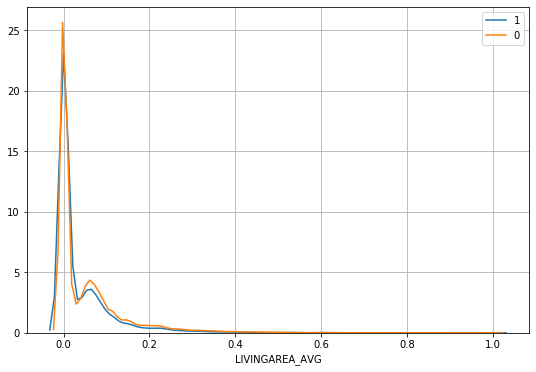

--------------------
NONLIVINGAPARTMENTS_AVG
NaN found, 213514


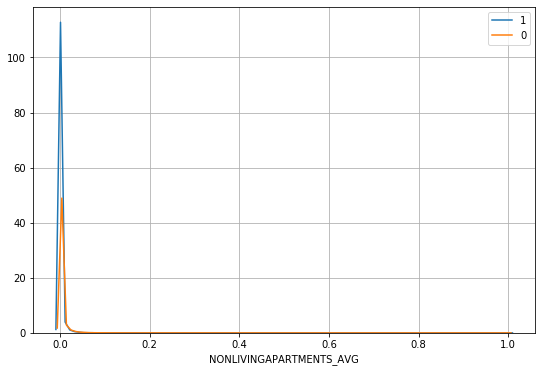

--------------------
NONLIVINGAREA_AVG
NaN found, 169682


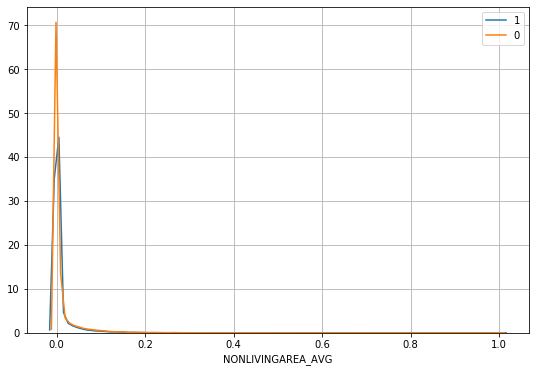

--------------------
APARTMENTS_MODE
NaN found, 156061


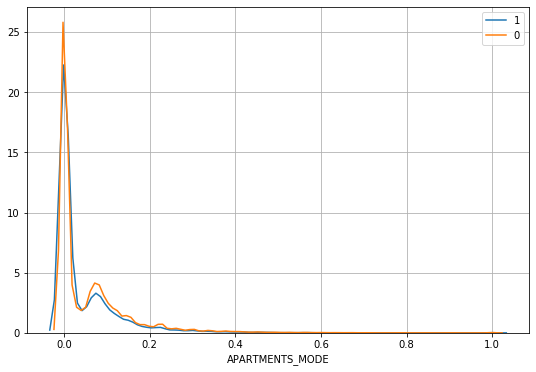

--------------------
BASEMENTAREA_MODE
NaN found, 179943


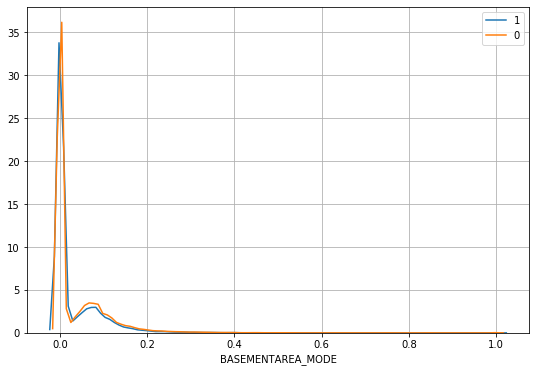

--------------------
YEARS_BEGINEXPLUATATION_MODE
NaN found, 150007


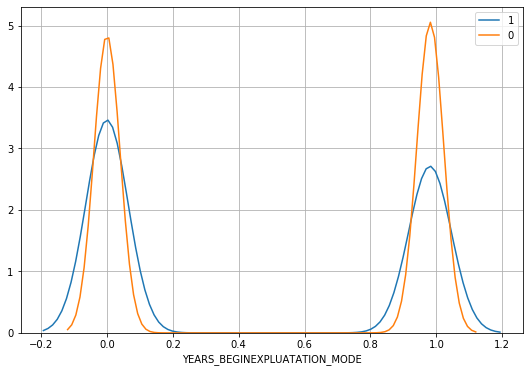

--------------------
YEARS_BUILD_MODE
NaN found, 204488


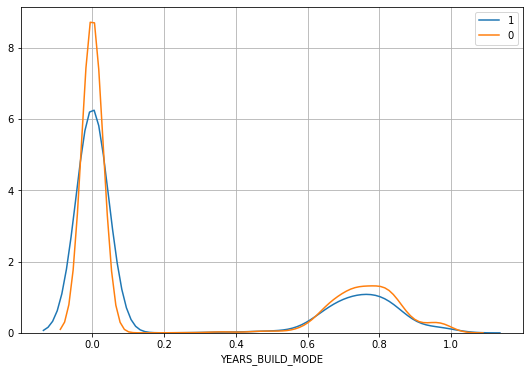

--------------------
COMMONAREA_MODE
NaN found, 214865


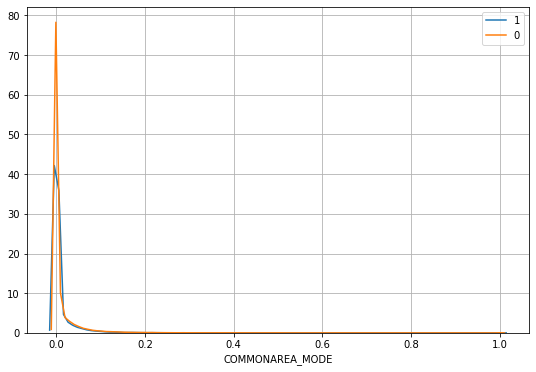

--------------------
ELEVATORS_MODE
NaN found, 163891


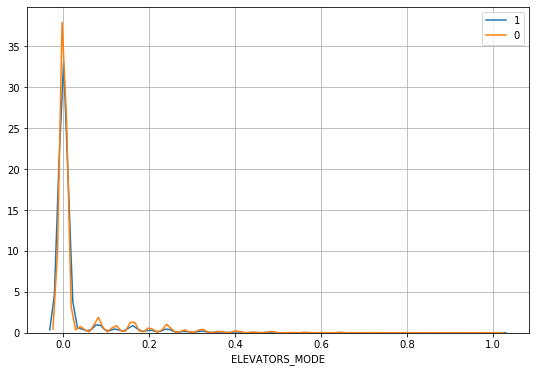

--------------------
ENTRANCES_MODE
NaN found, 154828


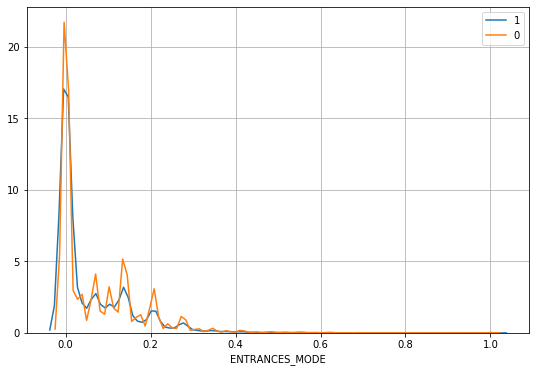

--------------------
FLOORSMAX_MODE
NaN found, 153020


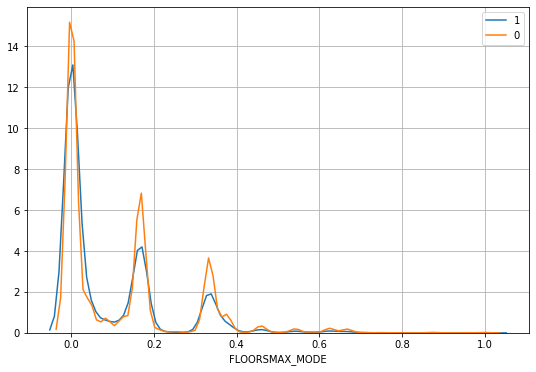

--------------------
FLOORSMIN_MODE
NaN found, 208642


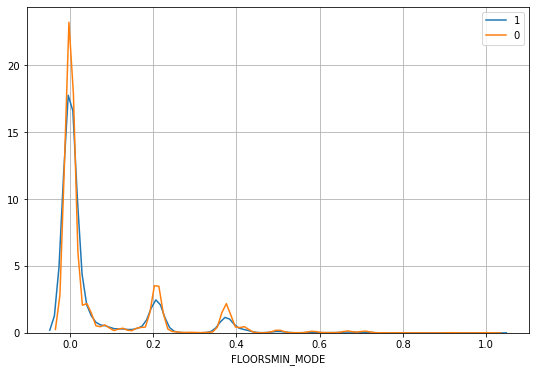

--------------------
LANDAREA_MODE
NaN found, 182590


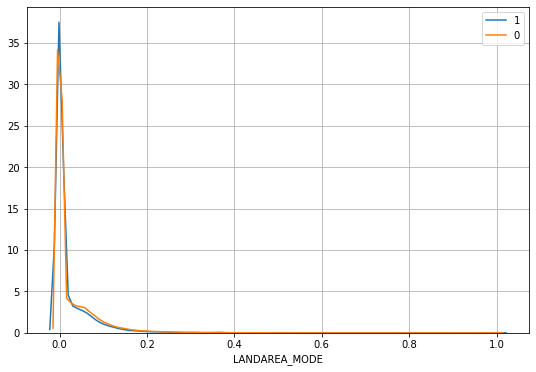

--------------------
LIVINGAPARTMENTS_MODE
NaN found, 210199


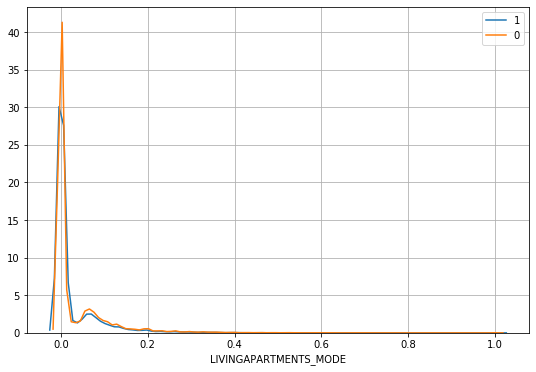

--------------------
LIVINGAREA_MODE
NaN found, 154350


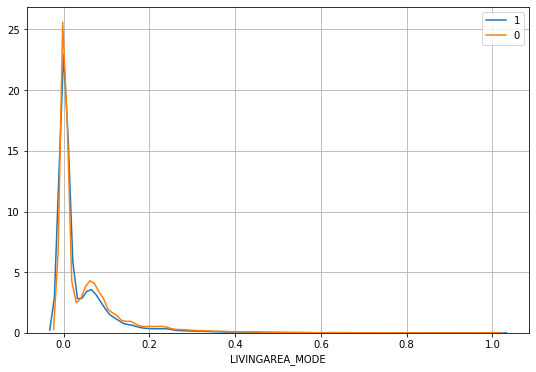

--------------------
NONLIVINGAPARTMENTS_MODE
NaN found, 213514


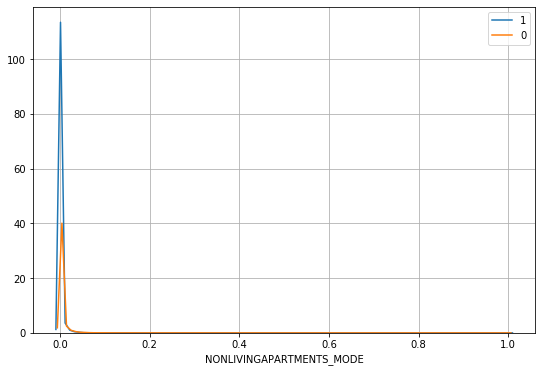

--------------------
NONLIVINGAREA_MODE
NaN found, 169682


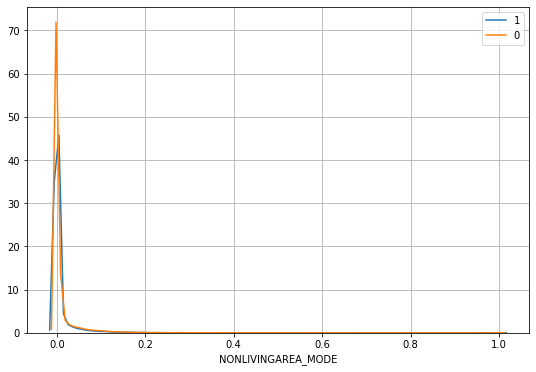

--------------------
APARTMENTS_MEDI
NaN found, 156061


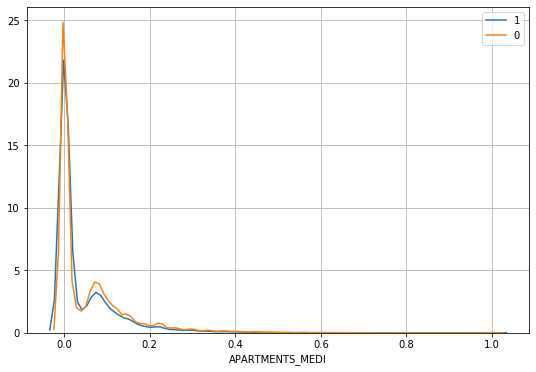

--------------------
BASEMENTAREA_MEDI
NaN found, 179943


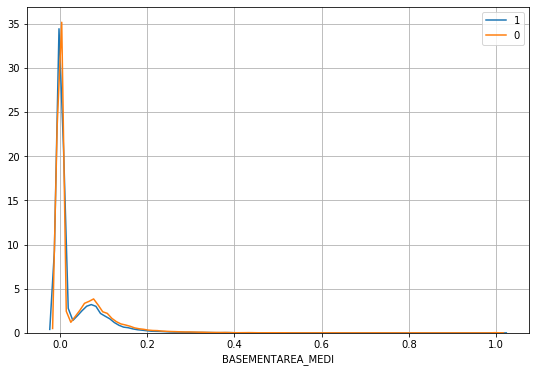

--------------------
YEARS_BEGINEXPLUATATION_MEDI
NaN found, 150007


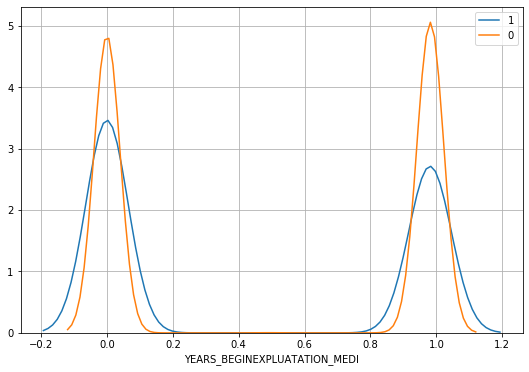

--------------------
YEARS_BUILD_MEDI
NaN found, 204488


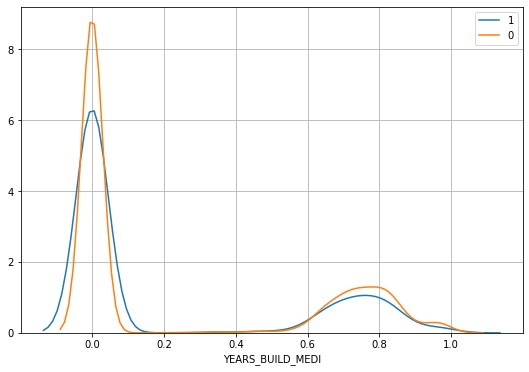

--------------------
COMMONAREA_MEDI
NaN found, 214865


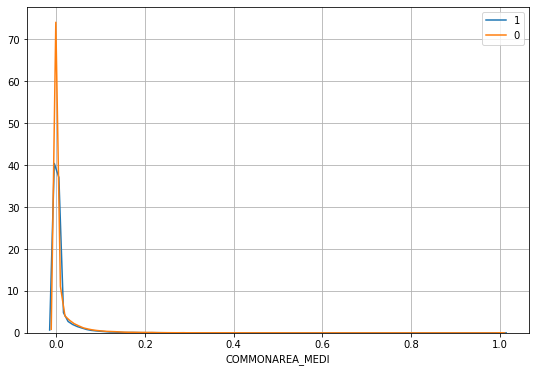

--------------------
ELEVATORS_MEDI
NaN found, 163891


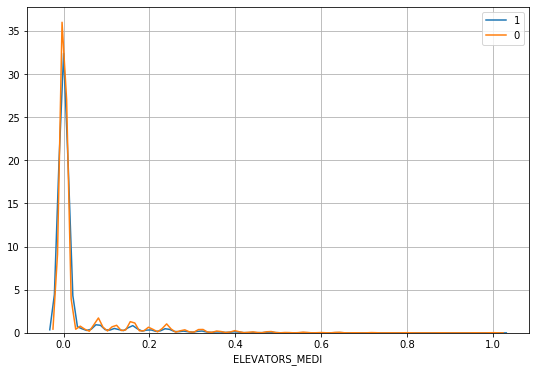

--------------------
ENTRANCES_MEDI
NaN found, 154828


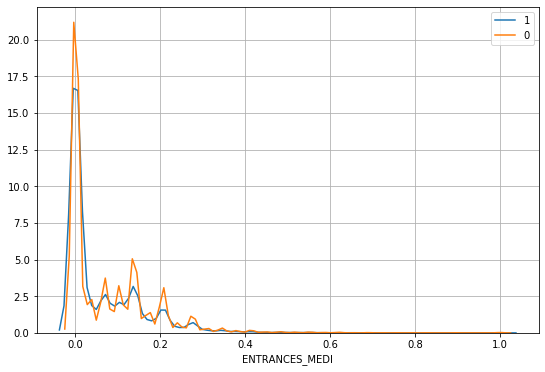

--------------------
FLOORSMAX_MEDI
NaN found, 153020


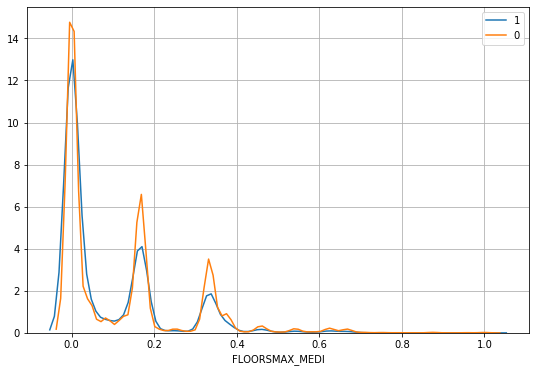

--------------------
FLOORSMIN_MEDI
NaN found, 208642


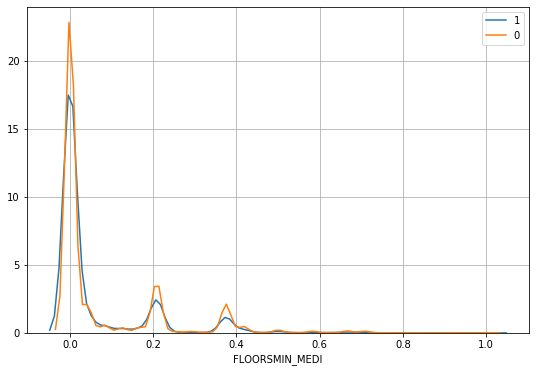

--------------------
LANDAREA_MEDI
NaN found, 182590


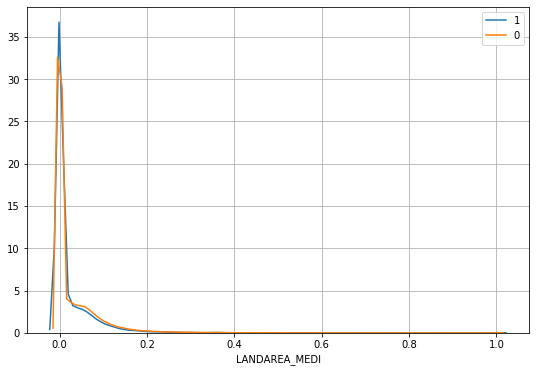

--------------------
LIVINGAPARTMENTS_MEDI
NaN found, 210199


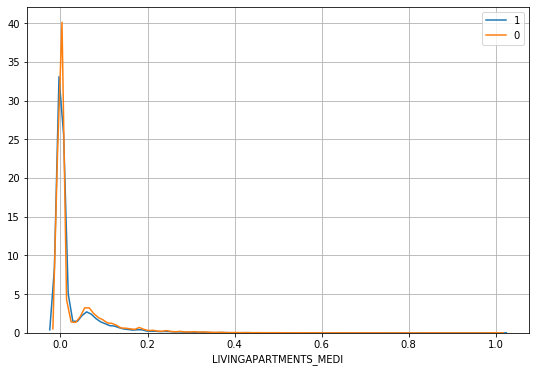

--------------------
LIVINGAREA_MEDI
NaN found, 154350


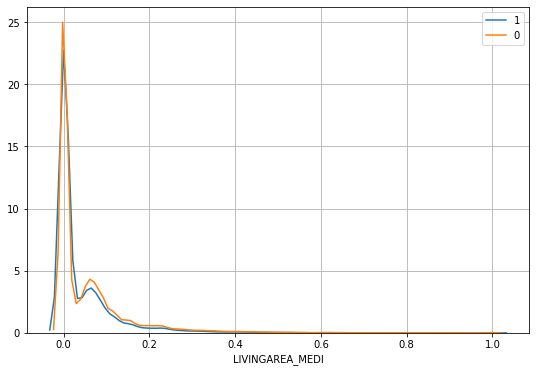

--------------------
NONLIVINGAPARTMENTS_MEDI
NaN found, 213514


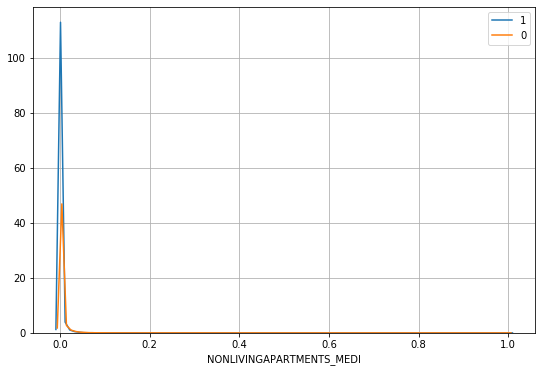

--------------------
NONLIVINGAREA_MEDI
NaN found, 169682


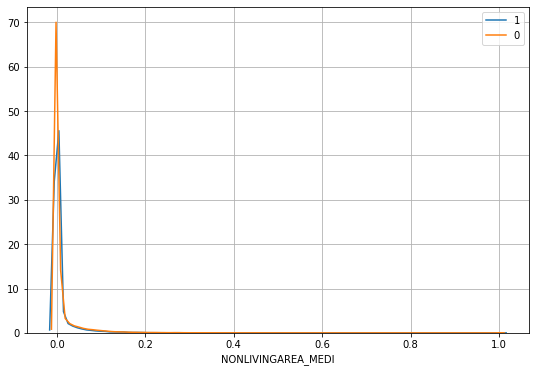

--------------------
FONDKAPREMONT_MODE
not specified: 5.85%	org spec account: 5.78%	reg oper account: 75.94%	reg oper spec account: 12.43%


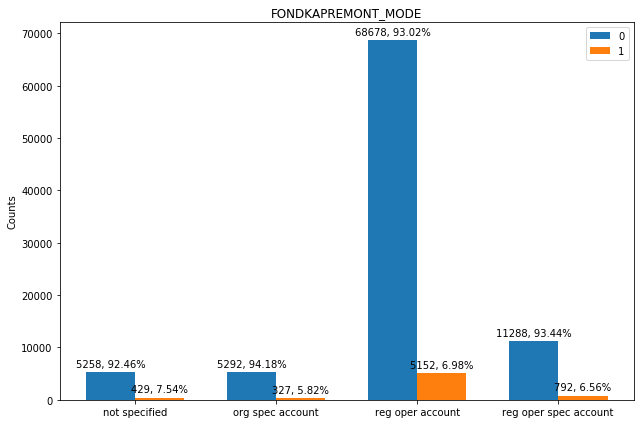

--------------------
HOUSETYPE_MODE
block of flats: 98.23%	specific housing: 0.98%	terraced house: 0.79%


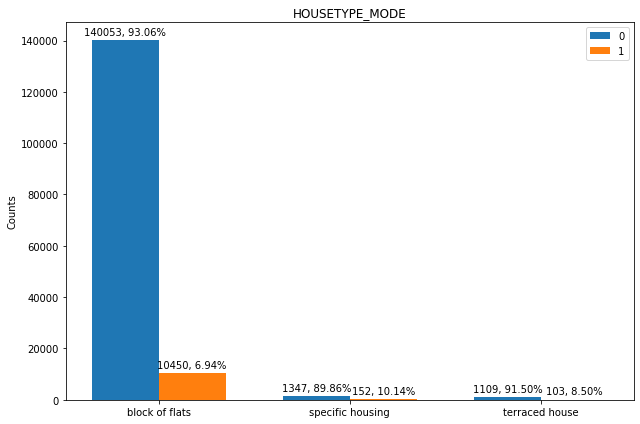

--------------------
TOTALAREA_MODE
NaN found, 148431


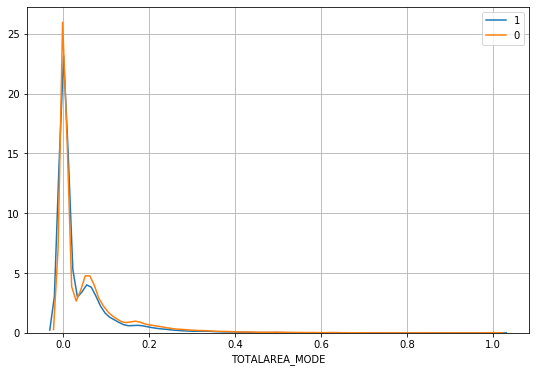

--------------------
WALLSMATERIAL_MODE
Block: 6.12%	Mixed: 1.52%	Monolithic: 1.18%	Others: 1.07%	Panel: 43.69%	Stone, brick: 42.88%	Wooden: 3.55%


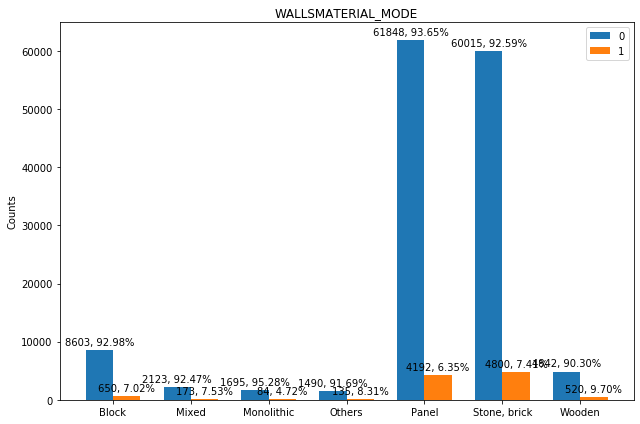

--------------------
EMERGENCYSTATE_MODE
No: 98.56%	Yes: 1.44%


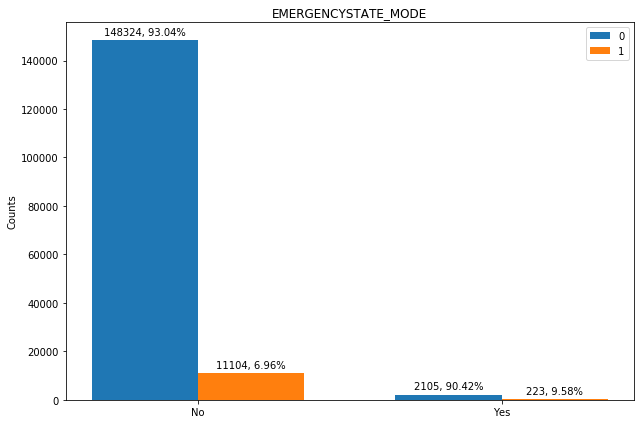

--------------------
OBS_30_CNT_SOCIAL_CIRCLE
NaN found, 1021


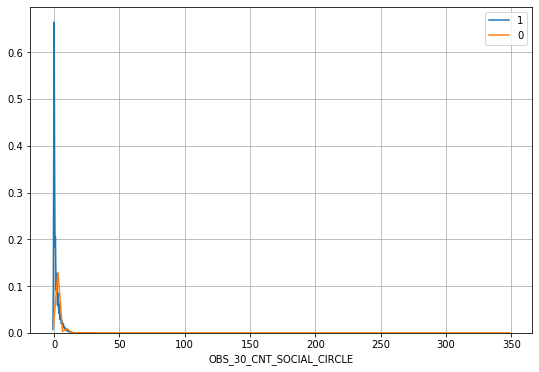

--------------------
DEF_30_CNT_SOCIAL_CIRCLE
NaN found, 1021


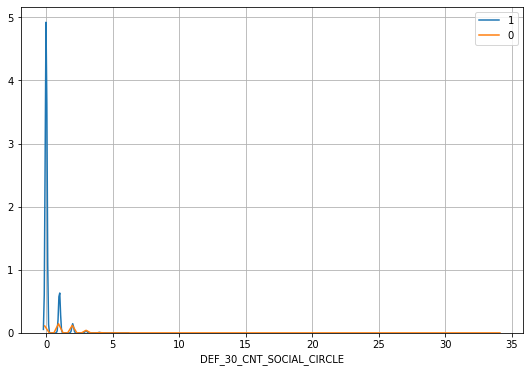

--------------------
OBS_60_CNT_SOCIAL_CIRCLE
NaN found, 1021


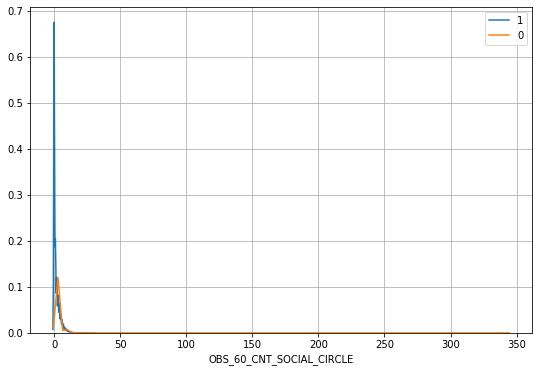

--------------------
DEF_60_CNT_SOCIAL_CIRCLE
NaN found, 1021


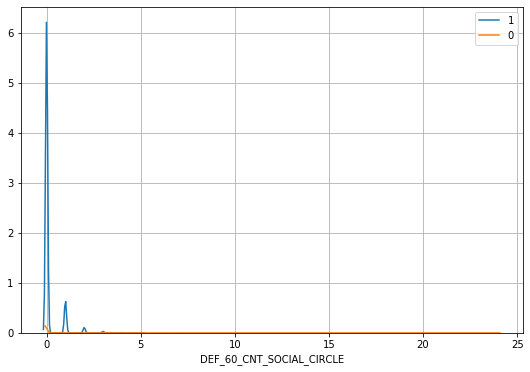

--------------------
DAYS_LAST_PHONE_CHANGE
NaN found, 1


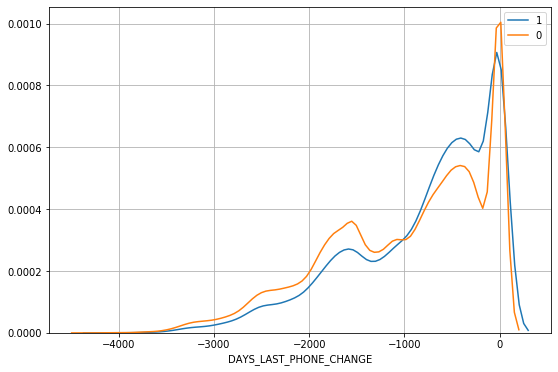

--------------------
FLAG_DOCUMENT_2
0: 100.00%	1: 0.00%


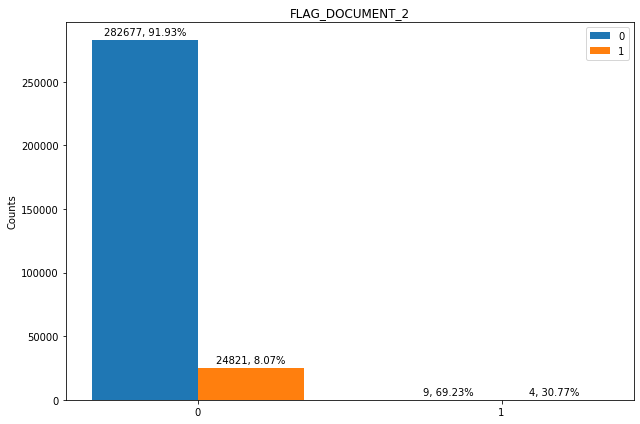

--------------------
FLAG_DOCUMENT_3
0: 29.00%	1: 71.00%


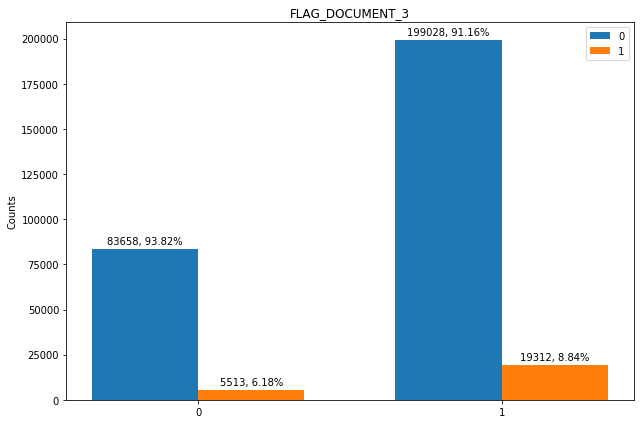

--------------------
FLAG_DOCUMENT_4
0: 99.99%	1: 0.01%


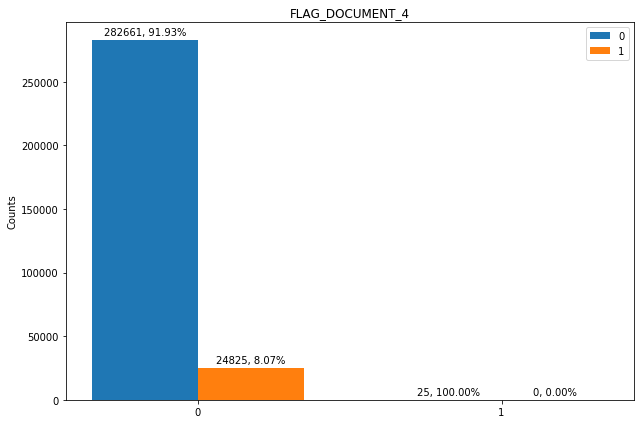

--------------------
FLAG_DOCUMENT_5
0: 98.49%	1: 1.51%


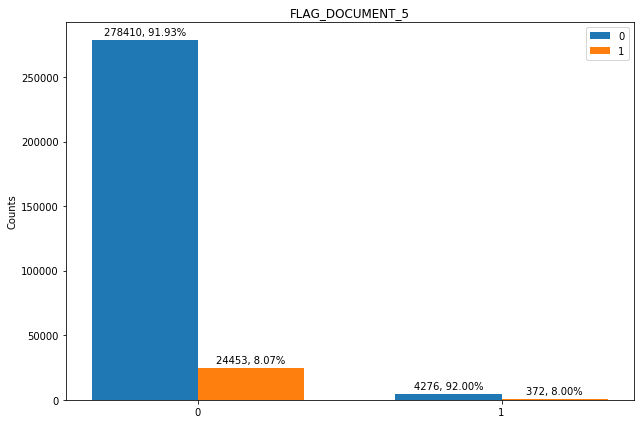

--------------------
FLAG_DOCUMENT_6
0: 91.19%	1: 8.81%


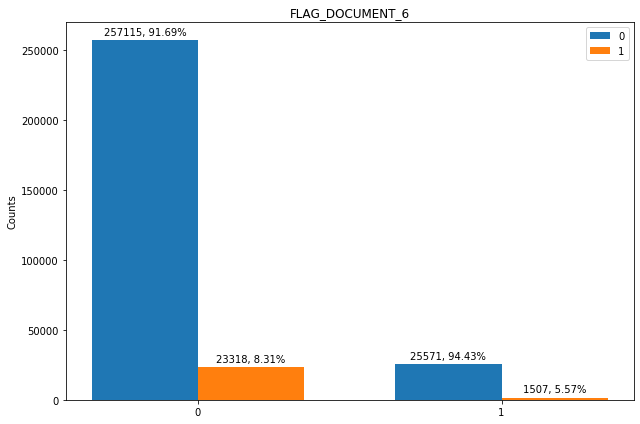

--------------------
FLAG_DOCUMENT_7
0: 99.98%	1: 0.02%


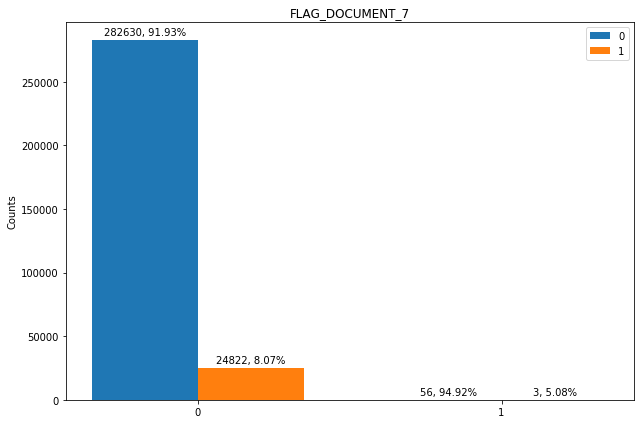

--------------------
FLAG_DOCUMENT_8
0: 91.86%	1: 8.14%


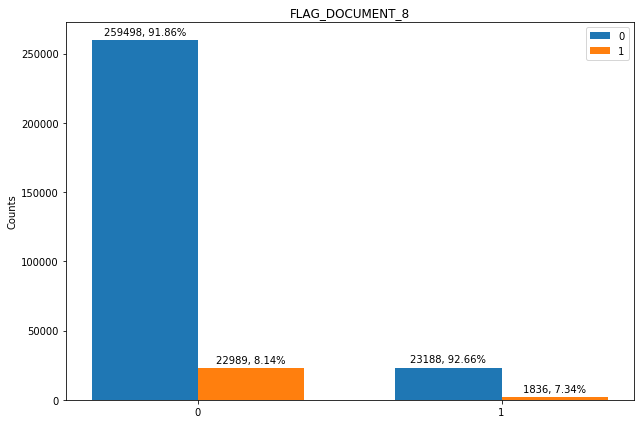

--------------------
FLAG_DOCUMENT_9
0: 99.61%	1: 0.39%


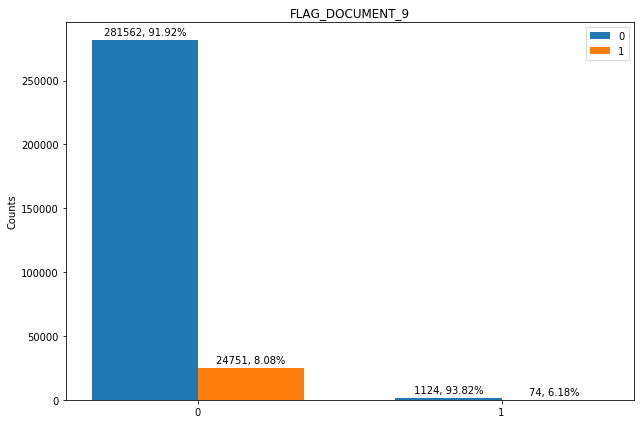

--------------------
FLAG_DOCUMENT_10
0: 100.00%	1: 0.00%


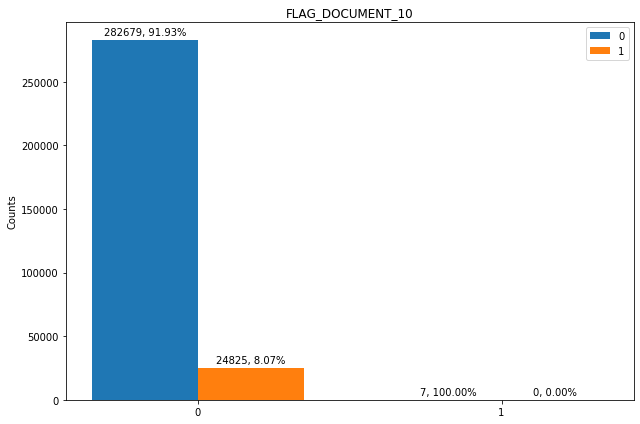

--------------------
FLAG_DOCUMENT_11
0: 99.61%	1: 0.39%


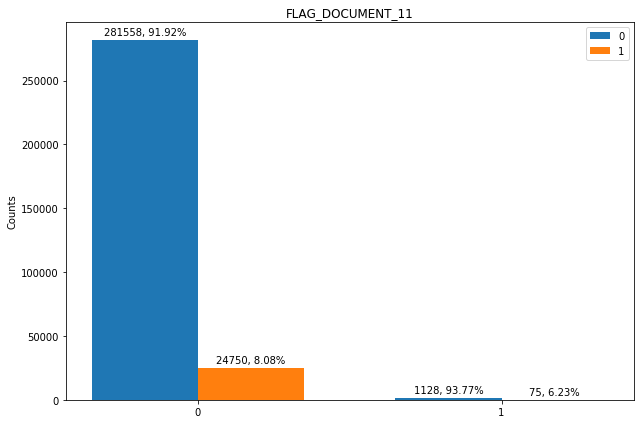

--------------------
FLAG_DOCUMENT_12
0: 100.00%	1: 0.00%


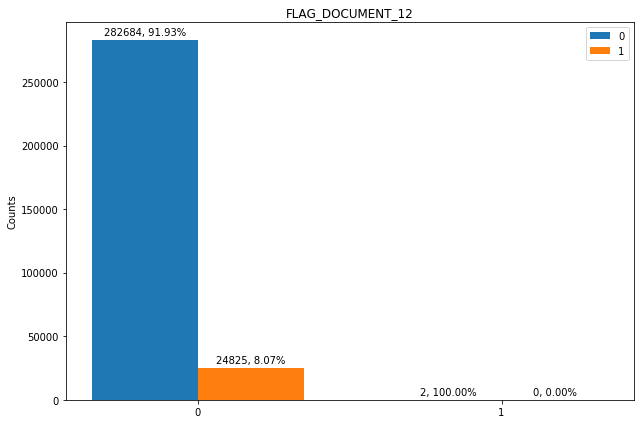

--------------------
FLAG_DOCUMENT_13
0: 99.65%	1: 0.35%


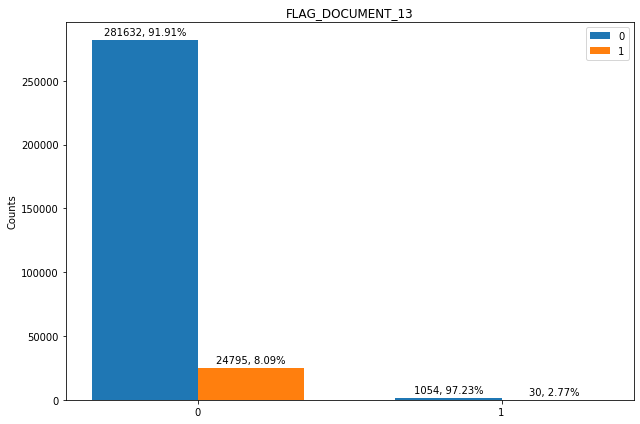

--------------------
FLAG_DOCUMENT_14
0: 99.71%	1: 0.29%


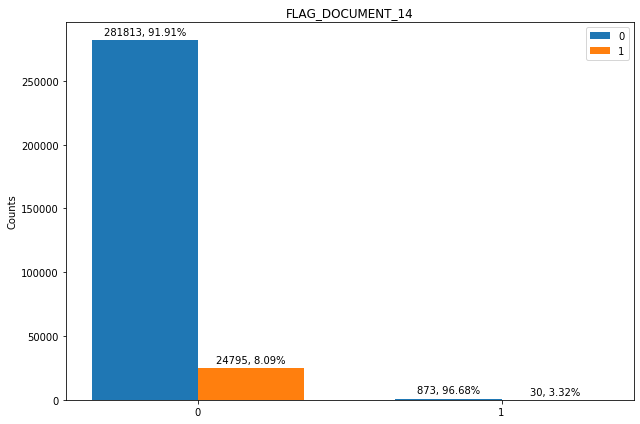

--------------------
FLAG_DOCUMENT_15
0: 99.88%	1: 0.12%


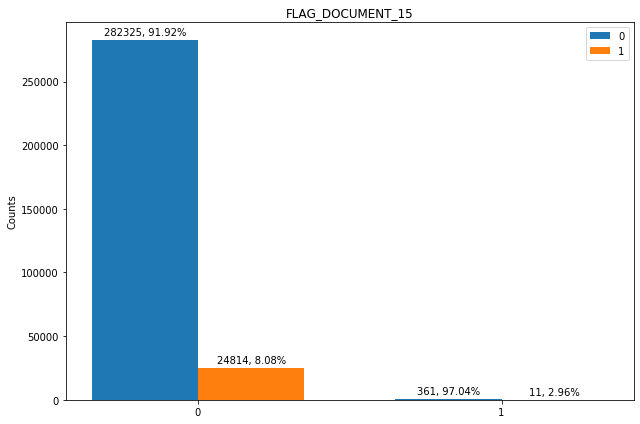

--------------------
FLAG_DOCUMENT_16
0: 99.01%	1: 0.99%


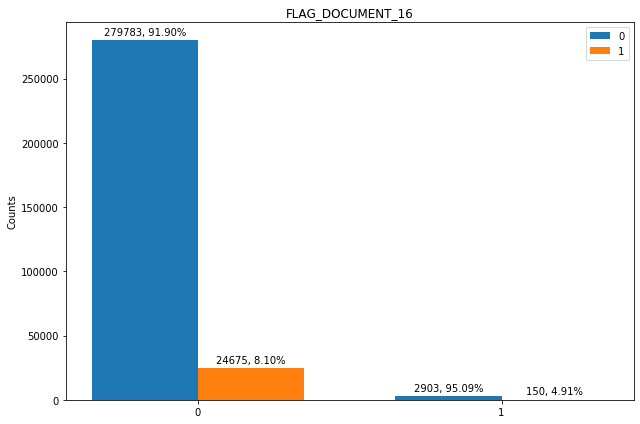

--------------------
FLAG_DOCUMENT_17
0: 99.97%	1: 0.03%


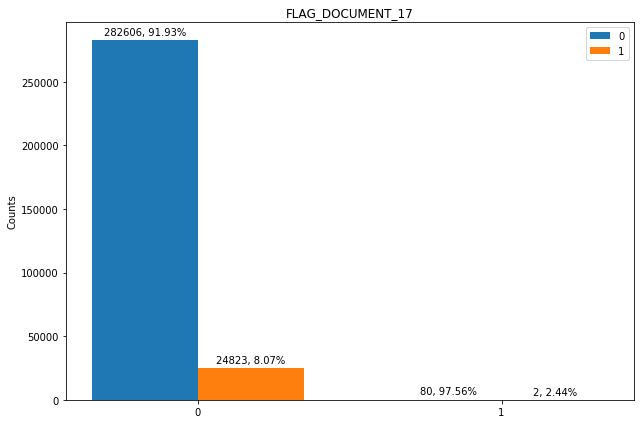

--------------------
FLAG_DOCUMENT_18
0: 99.19%	1: 0.81%


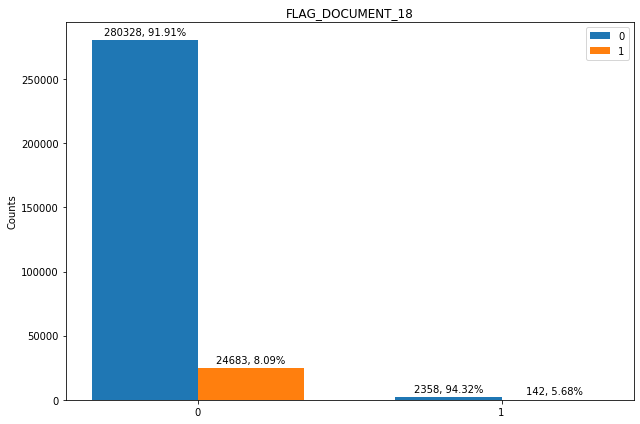

--------------------
FLAG_DOCUMENT_19
0: 99.94%	1: 0.06%


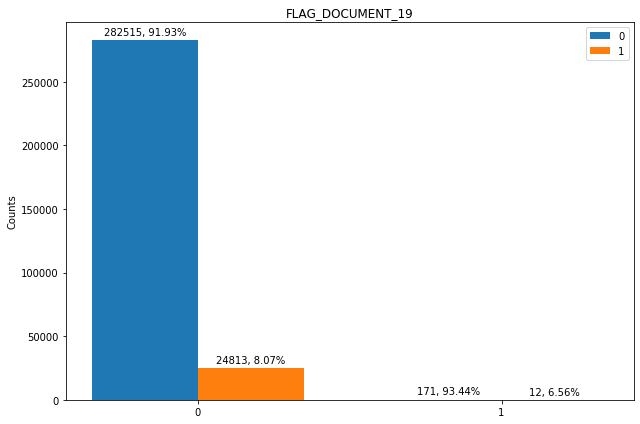

--------------------
FLAG_DOCUMENT_20
0: 99.95%	1: 0.05%


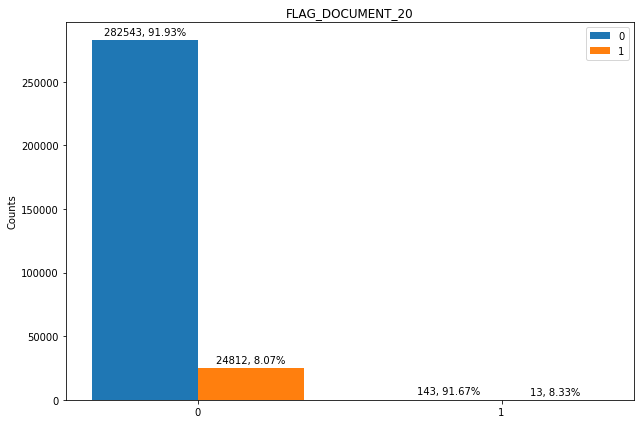

--------------------
FLAG_DOCUMENT_21
0: 99.97%	1: 0.03%


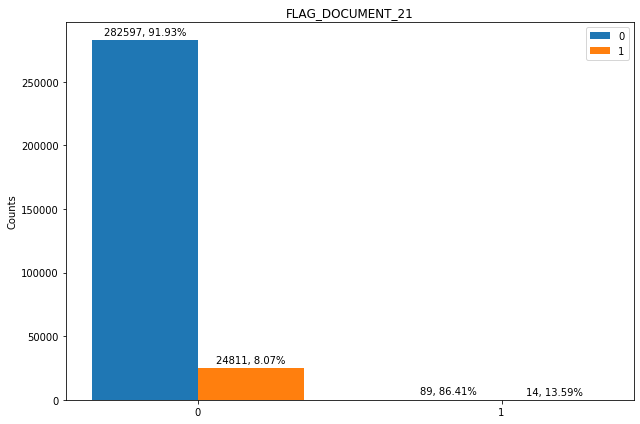

--------------------
AMT_REQ_CREDIT_BUREAU_HOUR
NaN found, 41519


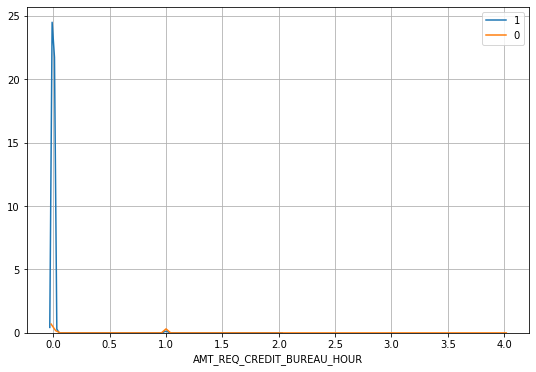

--------------------
AMT_REQ_CREDIT_BUREAU_DAY
NaN found, 41519


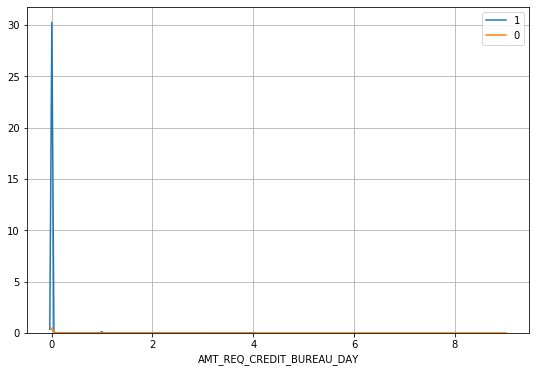

--------------------
AMT_REQ_CREDIT_BUREAU_WEEK
NaN found, 41519


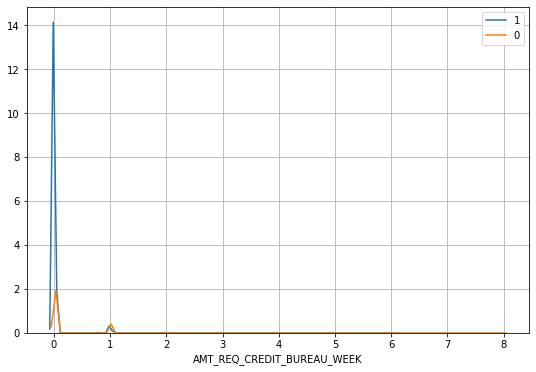

--------------------
AMT_REQ_CREDIT_BUREAU_MON
NaN found, 41519


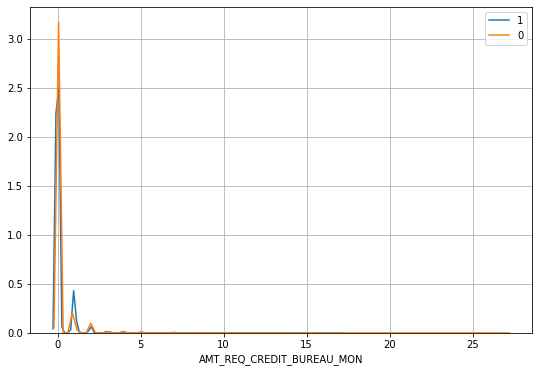

--------------------
AMT_REQ_CREDIT_BUREAU_QRT
NaN found, 41519


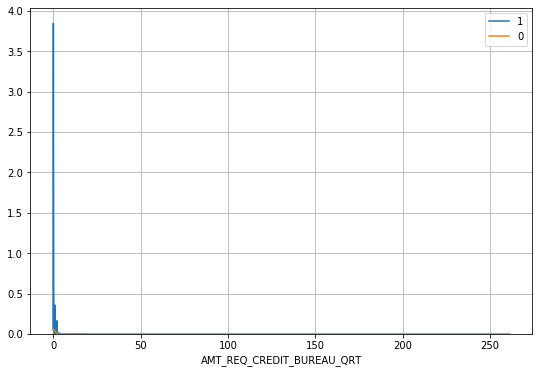

--------------------
AMT_REQ_CREDIT_BUREAU_YEAR
NaN found, 41519


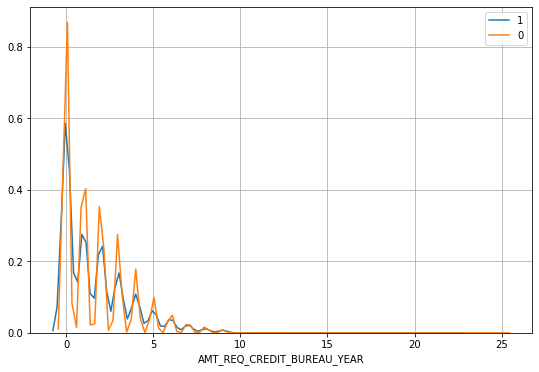

--------------------


In [40]:
for i in range(11, application_train.shape[1]):
    col = application_train.columns[i]
    print(col)
    if col.startswith('FLAG') or application_train[col].dtype == 'object':
        barplot(col)
    else:
        densityplot(col)
    print('-' * 20)

一些二元类指标中，某个分类的样本数为0，这类指标需要注意下，可以提前去除掉。

In [45]:
for c in application_train.columns:
    vc = application_train[c].value_counts()
    l = len(application_train[c].dropna())
    if sum(vc >= l-5) > 0:
        print(c)

FLAG_MOBIL
FLAG_DOCUMENT_12


## bureau 查看

In [46]:
bur = pd.read_csv('../rawdata/bureau.csv')

In [47]:
burb = pd.read_csv('../rawdata/bureau_balance.csv')

In [51]:
bur.shape
burb.shape

(27299925, 3)

In [48]:
bur.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [49]:
burb.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
